# 方向差分チェインコード

In [3]:
import numpy as np
import matplotlib
# matplotlib.use('Agg') # 表示しないモード。バッチ処理する場合、画像表示が多くなりすぎて　notebooke の制限で途中で止まってしまう。
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image
import math
import pandas as pd

from sympy import *
from sympy.abc import a,b,c
# init_session()
px,py =var('px:4'),var('py:4')
t = symbols('t')
from sympy import var
from rdlib2 import *

import datetime
import time

import os

# 輪郭データからのひげ除去
def shaver(cnt):  # 輪郭点列のうち、ヒゲ要素を取り除く
    # まず輪郭列のスタート部分がヒゲ要素を取り除く
    while True:
        if len(cnt) > 2 and list(cnt[1][0])==list(cnt[-1][0]): # 最初の点がヒゲの先端
            cnt = cnt[1:-1]
        else:
            break
    # 途中のヒゲ要素を取り除く
    while True:
            l = len(cnt)
            for  i in range(1,len(cnt)-1):
                    if list(cnt[i-1][0]) == list(cnt[i+1][0]):
                            cnt = np.r_[cnt[:i],cnt[i+2:]]
            if l == len(cnt):
                break
    return cnt

# 輪郭に沿った長さ

        
# (x1,y1)から（x2,y2) に向かう直線のX軸に対する角度(0-359)
def getDegree(x1,y1,x2,y2):
        dx = x2-x1
        dy = y2-y1
        if dx == 0 :
            if dy == 0: # 例外
                deg = 0
            elif dy > 0:
                deg = 90
            else:
                deg = 270
        elif dx >0 and dy >= 0:
            deg = 180.0*np.arctan(dy/dx)/np.pi
        elif dx > 0 and dy < 0: 
            deg = 360+180*np.arctan(dy/dx)/np.pi
        else:
            deg =180*(1+ np.arctan(dy/dx)/np.pi)
            # deg = 270.0(1+np.arctan(dy/dx)/np.pi)
        return deg

In [4]:
kohaku='シルエット/17Cylindric/17kohaku1o09_l.jpg'
yakumi ='シルエット/17Spheric/17yakumi2o06_l.jpg'
daruma='シルエット/17Apically/17daruma6o06_l.jpg'
aomida='シルエット/17Horn/17aomida1o02_l.jpg'
nezumi='シルエット/17Inv_tri/17nezumi1o06_l.jpg'

kohakuimg = getstandardShape(cv2.imread(kohaku,cv2.IMREAD_GRAYSCALE), unitSize=UNIT, thres=0.25)  
akumiimg = getstandardShape(cv2.imread(yakumi,cv2.IMREAD_GRAYSCALE), unitSize=UNIT, thres=0.25)  
darumaimg = getstandardShape(cv2.imread(daruma,cv2.IMREAD_GRAYSCALE), unitSize=UNIT, thres=0.25)  
aomidaimg = getstandardShape(cv2.imread(aomida,cv2.IMREAD_GRAYSCALE), unitSize=UNIT, thres=0.25)  
nezumiimg = getstandardShape(cv2.imread(nezumi,cv2.IMREAD_GRAYSCALE), unitSize=UNIT, thres=0.25)  

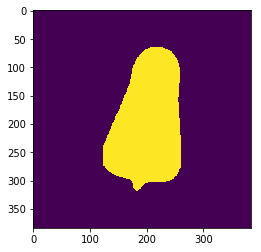

In [5]:
img = nezumiimg
plt.imshow(img)

(202.0, 198.0, (123, 65, 138, 253, 25059))

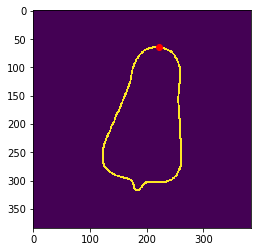

In [6]:
# 輪郭情報
c_x,c_y,(x0,y0,w0,h0,areas) = getCoG(img) # 重心とバウンディングボックスと面積
_image, contours, _hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # 輪郭線追跡
cnt00 = contours[np.argmax([len(c) for c in contours])] # 最も長い輪郭
cnt00 = shaver(cnt00)
canvas = np.zeros_like(img)
canvas = cv2.drawContours(canvas,[cnt00],-1,255,2)
plt.scatter([cnt00[-10][0][0]],[cnt00[-10][0][1]],color="red")
plt.imshow(canvas)
c_x,c_y,(x0,y0,w0,h0,areas)

In [7]:
cnt01 = [[x,y] for [[x,y]] in cnt00]  # ２重カッコを１重に変換
#  3  2  1
#  4       0
#  5  6  7

def  directcode(x0,y0,x1,y1):
    if y1 == y0-1:
        if x1 == x0-1:
            code = 3
        elif x1 == x0:
            code = 2
        else:
            code = 1
    elif y1 == y0:
        if x1 == x0-1:
            code = 4
        else:
            code = 0
    else:
        if x1 == x0-1:
            code = 5
        elif x1 == x0:
            code = 6
        else:
            code = 7
    return code

result = []
for i in range(len(cnt01)-1):
    x0 = cnt01[i][0]
    y0 = cnt01[i][1]
    x1 = cnt01[i+1][0]
    y1 = cnt01[i+1][1]
    result.append( directcode(x0,y0,x1,y1))
x0,y0 = x1,y1
x1,y1 = cnt01[0][0],cnt01[0][1]
result.append(directcode(x0,y0,x1,y1))

print('チェインコード',cnt01[i],result)

result1 = [(n1 - n0) % 8  if (n1 - n0) % 8 <  4 else ((n1 - n0) % 8 - 8) for (n0,n1) in zip(result[:-1],result[1:])]
d = (result[0]-result[-1]) % 8 if  (result[0]-result[-1]) % 8 < 4 else  ((result[0]-result[-1]) % 8) -8
result1.append(d)
result = result1 
print('方向差分チェインコード',cnt01[i],result)


チェインコード [213, 65] [5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 0, 0, 7, 0, 0, 0, 7, 0, 0, 0, 7, 0, 0, 7, 0, 7, 7, 7, 7, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 7, 0, 7, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 